In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("/home/yash/Downloads/weight-height.csv")
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [3]:
df.shape

(10000, 3)

In [4]:
df["Height"].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

<Axes: xlabel='Height', ylabel='Count'>

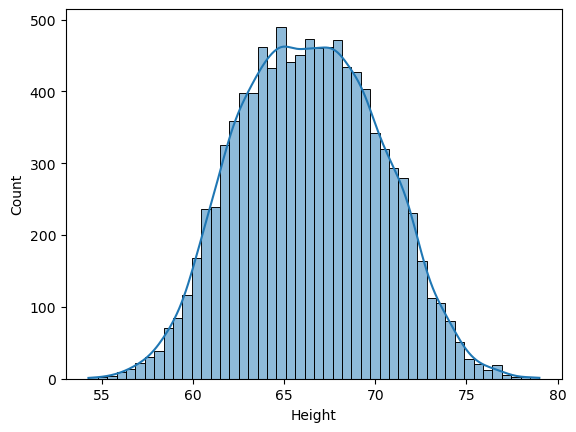

In [5]:
sns.histplot(df["Height"],kde = True)

<Axes: xlabel='Height'>

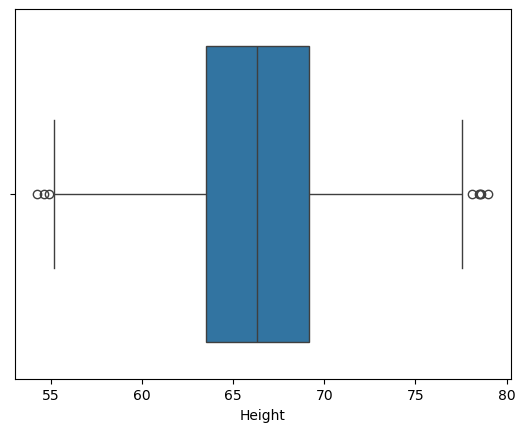

In [6]:
sns.boxplot(x = df["Height"])

In [7]:
upper_lim = df["Height"].quantile(0.999)
lower_lim = df["Height"].quantile(0.001)
print(upper_lim,lower_lim)

77.06738853278372 56.06654891162125


## 1.Triming

In [8]:
new_df_trf = df[(df["Height"] < upper_lim) & (df["Height"] > lower_lim)]
new_df_trf.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [9]:
new_df_trf.shape

(9980, 3)

In [10]:
df["Height"].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

In [11]:
new_df_trf["Height"].describe()

count    9980.000000
mean       66.367038
std         3.817813
min        56.066636
25%        63.520154
50%        66.318070
75%        69.169040
max        77.067355
Name: Height, dtype: float64

<Axes: xlabel='Height', ylabel='Count'>

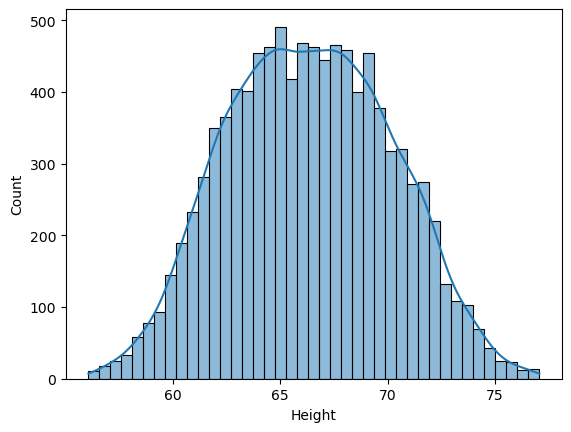

In [12]:
sns.histplot(new_df_trf["Height"],kde = True)

<Axes: xlabel='Height'>

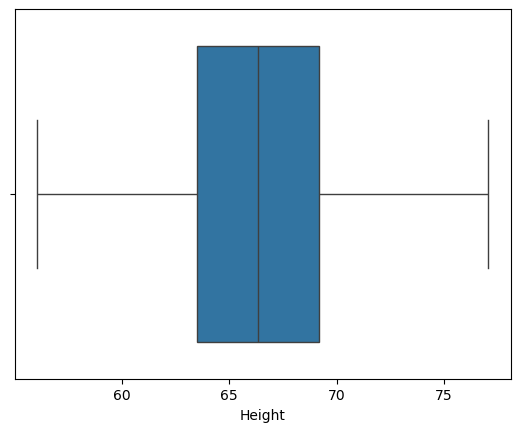

In [13]:
sns.boxplot(x = new_df_trf["Height"])

## 2.Caping (Winsorization)

In [14]:
new_df_cap = df.copy()

In [15]:
new_df_cap["Height"] = np.where(df["Height"] > upper_lim,
                                upper_lim,
                                df["Height"])

new_df_cap["Height"] = np.where(df["Height"] < lower_lim,
                                lower_lim,
                                df["Height"])

In [16]:
df["Height"].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

In [17]:
new_df_cap["Height"].describe()

count    10000.000000
mean        66.368313
std          3.845397
min         56.066549
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

<Axes: xlabel='Height', ylabel='Count'>

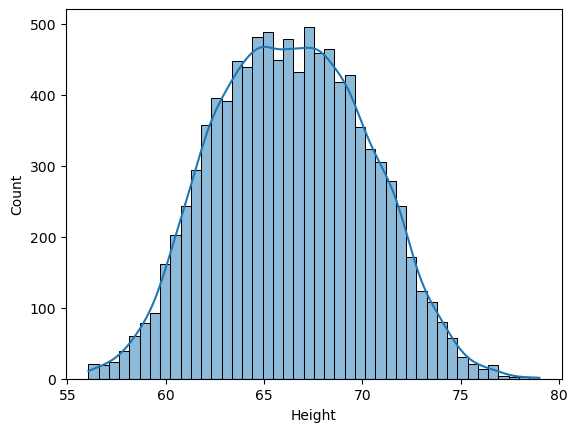

In [18]:
sns.histplot(new_df_cap["Height"],kde = True)

<Axes: xlabel='Height'>

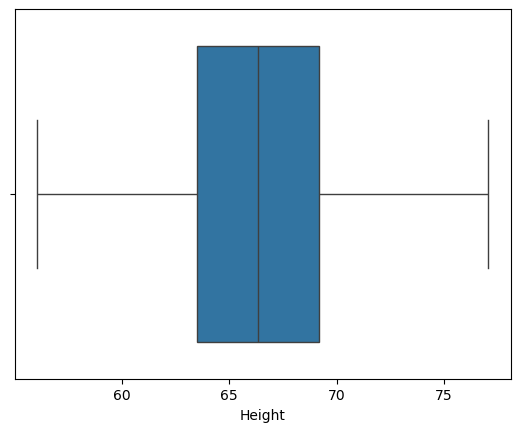

In [19]:
sns.boxplot(x = new_df_trf["Height"])